# Data analysis 

- Duration of samples and differences
- Plot the mean square energy over time
- Zero-Crossing Rate (ZCR) = Rate the signal changes from pos to neg
- Silence Ratio -> The ratio of pauses in the audio through silence 

Data Directory Contents:
------------------------
ASVspoof2019_LA_asv_protocols
ASVspoof2019_LA_asv_scores
ASVspoof2019_LA_cm_protocols
ASVspoof2019_LA_dev
ASVspoof2019_LA_eval
ASVspoof2019_LA_train
README.LA.txt
------------------------
2990    spoof
2991    spoof
2992    spoof
2993    spoof
2994    spoof
2995    spoof
2996    spoof
2997    spoof
2998    spoof
2999    spoof
Name: label, dtype: str


Loading ITables v2.7.0 from the internet... (need help?)


Found 8 missing entries:
filename    0
label       0
attack      0
duration    0
mean        0
std         0
max         0
min         0
dtype: int64
Found 3000 duplicate entries:
0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool


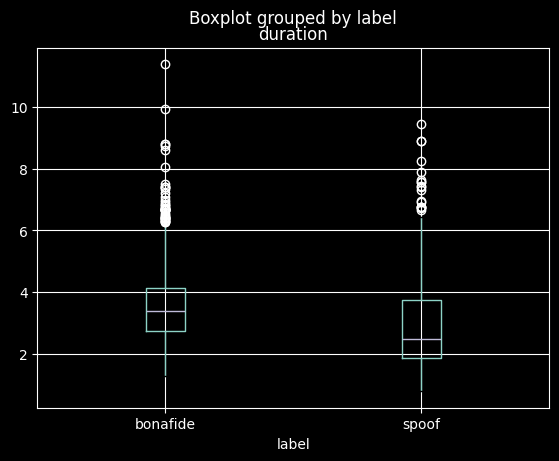

In [1]:
import sys
import os
from itables import init_notebook_mode, show
from Backend.app import app

init_notebook_mode(connected=True)
root = os.path.abspath('../Backend/app')

if root not in sys.path:
    sys.path.insert(0, root)

sys.path.insert(0, root)

app.main()


In [ ]:
# Data Anlaysis - sample duration 
# Data Anlaysis - sample duration

import numpy as np 
import pandas as pd
import soundfile as sf
import os
import librosa
from pathlib import Path
from itables import init_notebook_mode, show


project_path = os.path.abspath(os.sep) + 'Users/Luis/Desktop/LA/LA/'
train_data_path = project_path + 'ASVspoof2019_LA_train/flac'
train_protocol_path = project_path + 'ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'

print(train_protocol_path)


train_df = pd.read_csv(train_protocol_path, sep = ' ', header = None, names = ['speaker_id', 'file_name', 'system_id', 'attack_type','key'])
print(f'Found {len(train_df)} files in protocol.')

results = []
train_bon_samples = train_df[train_df['key'] == 'bonafide']['file_name'].iloc[:len(train_df)].tolist()
train_spoofed_samples = train_df[train_df['key'] == 'spoofed']['file_name'].iloc[:len(train_df)].tolist()
train_samples = train_bon_samples + train_spoofed_samples

for filename in train_samples[:10]:
    try:
        file_path = os.path.join(train_data_path, filename + '.flac')
        y, sr = sf.read(file_path, dtype = 'float32')

        if y.ndim > 1:
            y = y.mean(axis=1)
            
        if sr != 16000:
            y = librosa.resample(y, orig_sr = sr, target_sr = 16000)
            sr = 16000

        key = train_df[train_df['file_name'] == filename]['key'].values[0]
        attack = train_df[train_df['file_name'] == filename]['attack_type'].values[0]

        results.append({
            'filename': filename,
            'label': key,
            'attack': attack,
            'duration': len(y)/sr,
            'mean': y.mean(),
            'std': y.std(),
            'max': y.max(),
            'min': y.min()
        })

    except Exception as e:
        print(f"{filename}: {e}")

if results: 
    results_df = pd.DataFrame(results)
    print('\nSummary')
    print(results_df)

In [ ]:
import soundfile as sf
data, sr = sf.read(file_path)
print("Loaded with soundfile!")

In [ ]:
list_of_samples = []
for file in os.listdir(train_data_path):

    if file.endswith('.flac') and os.path.isfile(os.path.join(train_data_path,file)):
        file_path = os.path.join(train_data_path, file)
        
        with open(file_path, 'rb') as f:
            data = f.read()
        list_of_samples.append((data, file))
    else:
        print(f'Skipping {file}, is not a .flac file.')


dev_data_folder = 'Desktop/LA/LA/ASVspoof2019_LA_dev'
eval_data_folder = 'Desktop/LA/LA/ASVspoof2019_LA_eval'
save_folder = 'Griffith/Vishing_project/Notebook'
list_of_samples = []